# Data Preprocessing

In [3]:
#importing all libraries
import numpy as np #for scientific calculation
import matplotlib.pyplot as plt #for visualising the data
import pandas as pd #for data manipulation and analysis
import os #module for interacting with the operating system.
import cv2
import pickle #serializing and deserialization of data

In [2]:
#Directory
data_dir ='C:\\Users\\Rituraj\\Documents\\new file\\archive\\flowers' 

In [3]:
os.listdir(data_dir) #no of classes in this dataset

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [4]:
categories=['dandelion', 'sunflower', 'daisy', 'tulip', 'rose']

# Visualization of Data

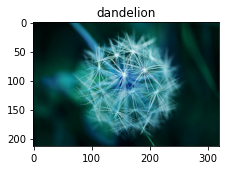

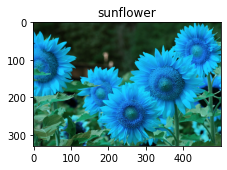

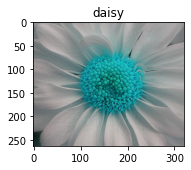

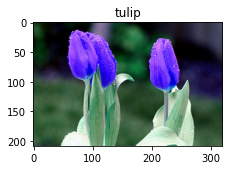

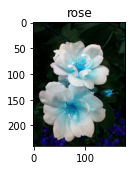

In [17]:
for i in categories:
    path=os.path.join(data_dir,i)## first iterate to add dandelion and so till rose folders.
    label=categories.index(i)
    plt.figure(figsize=(10,5))
    for j in os.listdir(path):
        image=cv2.imread(os.path.join(path,j)) 
        plt.subplot(2,2,2)
        plt.imshow(image/255)
        plt.title(i)
        plt.show()
        break

# Preparing the Data

In [18]:
data=[]
for i in categories:
    path=os.path.join(data_dir,i) ## first iterate to add dandelion and so till rose folders.
    label=categories.index(i)
    for j in os.listdir(path):
        image_path=os.path.join(path,j)
        image=cv2.imread(image_path)
        try:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image,(224,224))
            image=np.array(image,dtype=np.float32)
            data.append([image,label])
        
        except Exception as e:
            pass

In [35]:
print(len(data)) #length of image data in the form of list, which is converted to as numpy array
print(type(data))

4323
<class 'list'>


# Data storing in the Byte form

In [60]:
pik=open('data.pickle','wb') #serialization of data into byte form
pickle.dump(data,pik)
pik.close()

In [5]:
pick=open('data.pickle','rb') #deserialization of data to to its orginal form
data=pickle.load(pick)
pick.close()

In [6]:
np.random.shuffle(data) # shuffling the data because, prediction is based on five classes

# Building Features and Labels of data

In [7]:
features=[]
labels=[]
for img, label in data:
    features.append(img)
    labels.append(label)

In [8]:
feature=np.array(features,dtype=np.float32) # converting list type of data to numpy array which having type Float
labels=np.array(labels,dtype=np.float32)
feature=feature/255.0

In [4]:
#importing libraris for building model
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Splitting data into X_train,X_test, Y_train and Y_test

In [9]:
x_train,x_test,y_train,y_test=train_test_split(feature,labels,test_size=0.1) 

# Creating CNN Model

In [11]:
#### creating Model
input_layer=tf.keras.layers.Input([224,224,3])

conv1=tf.keras.layers.Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu')(input_layer)

pool1=tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)

#####conv 2###

conv2=tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu')(pool1)

pool2=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv2)

#####conv 3###

conv3=tf.keras.layers.Conv2D(filters=96,kernel_size=(3,3),padding='Same',activation='relu')(pool2)

pool3=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv3)

#####conv 4###

conv4=tf.keras.layers.Conv2D(filters=96,kernel_size=(3,3),padding='Same',activation='relu')(pool3)

pool4=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv4)

In [12]:
flt=tf.keras.layers.Flatten()(pool4) ###Flatten dims

In [13]:
dn1=tf.keras.layers.Dense(512,activation='relu')(flt)

In [14]:
out=tf.keras.layers.Dense(5,activation='softmax')(dn1)

In [15]:
model=tf.keras.Model(input_layer,out)

# Compiling the Keras Model & Summary

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 96)        0     

In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [18]:
History=model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data =(x_test,y_test))

Train on 3890 samples, validate on 433 samples
Epoch 1/10
3890/3890 [==============================] - 761s 196ms/sample - loss: 1.2515 - accuracy: 0.4707 - val_loss: 1.0953 - val_accuracy: 0.5427
Epoch 2/10
3890/3890 [==============================] - 681s 175ms/sample - loss: 0.9468 - accuracy: 0.6396 - val_loss: 0.9396 - val_accuracy: 0.6536
Epoch 3/10
3890/3890 [==============================] - 763s 196ms/sample - loss: 0.8282 - accuracy: 0.6797 - val_loss: 0.9370 - val_accuracy: 0.6328
Epoch 4/10
3890/3890 [==============================] - 732s 188ms/sample - loss: 0.6658 - accuracy: 0.7445 - val_loss: 0.8981 - val_accuracy: 0.6790
Epoch 5/10
3890/3890 [==============================] - 738s 190ms/sample - loss: 0.4822 - accuracy: 0.8198 - val_loss: 1.0743 - val_accuracy: 0.6282
Epoch 6/10
3890/3890 [==============================] - 704s 181ms/sample - loss: 0.3260 - accuracy: 0.8805 - val_loss: 1.2686 - val_accuracy: 0.6074
Epoch 7/10
3890/3890 [==============================]

# Evaluating the Model Performance

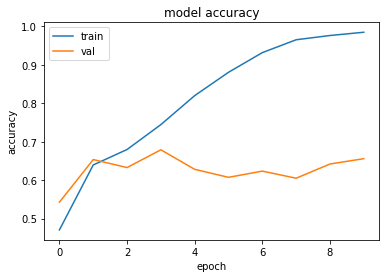

In [38]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

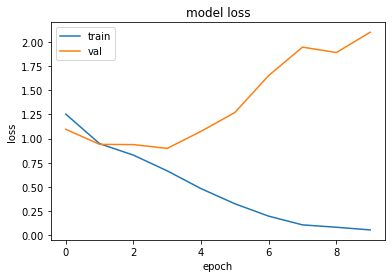

In [22]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
model.save('Mymodel.h5') # saving the model

In [10]:
model=tf.keras.models.load_model('Mymodel.h5') #load model using keras

# Testing and Predcting The Model

In [13]:
model.evaluate(x_test,y_test,verbose=1) ####Testing the model

433/433 [==============================] - 16s 38ms/sample - loss: 0.1575 - accuracy: 0.9677


[0.1575142508673785, 0.96766746]

In [14]:
prediction=model.predict(x_test) #prediction

In [26]:
prediction[0]

array([9.9366362e-11, 3.0225205e-14, 1.0000000e+00, 3.4254706e-16,
       1.6340726e-19], dtype=float32)

In [27]:
y_test=np.array(y_test,dtype=np.int)

In [28]:
type(y_test)

numpy.ndarray

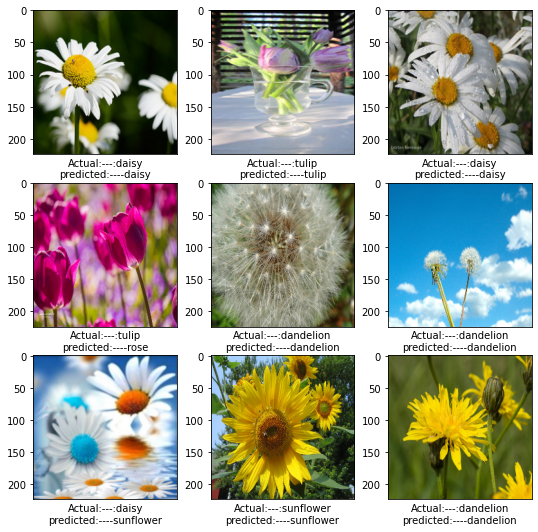

In [29]:
plt.figure(figsize=(9,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i])
    plt.xlabel('Actual:---:'+categories[y_test[i]]+'\n'+'predicted:----'+categories[np.argmax(prediction[i])])
    plt.xticks([])
plt.show()
print('\t')

In [30]:
#!pip install Pillow
from PIL import Image

In [31]:
#To resize original image to standard format and saving it
img1 = Image.open('flower.jpg')
imResize = img1.resize((224,224), Image.ANTIALIAS)
imResize.save('flower.jpg', 'JPEG', quality=90)

(1, 224, 224, 3)

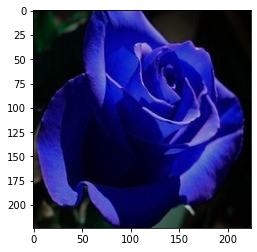

In [32]:
predict=cv2.imread("flower.jpg",1)
predictimg=np.array(predict)
plt.imshow(predict)
predict=predict/255.0

predict = np.expand_dims(predictimg, axis=0)
predict.shape

In [33]:
pred=model.predict(predict)
pred=np.squeeze(pred)
print(pred)
predIndex=np.argmax(pred)

[0. 0. 0. 0. 1.]


In [34]:
print("The Species of given image is",categories[predIndex])

The Species of given image is rose


# Accuracy, Precision, Recall, Confusion Matrix 

In [11]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

In [ ]:
print(classification_report(y_test, prediction))

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(3.5,2.5))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, linewidths=.5, ax=ax, fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
plt.title('Training Set Confusion Matrix')